# Greedy Deterministic Agent

The agent has a number multiple thresholds according to - say - the number of infectious cases.

## Setup

In [ ]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl
import utils

## Simulation

In [7]:
def greedy_threshold(states):
    susceptible, infectious, quarantined, recovered = states
    
    infection_rate = infectious / (infectious + susceptible + quarantined + recovered)

    # print(infection_rate)
    
    if infection_rate >= 0.01:
        action_id = 1
    elif infection_rate >= 0.005:
        action_id = 2
    elif infection_rate >= 0.001:
        action_id = 3
    else:
        action_id = 0
        
    action_proba = [0.0] * 4
    action_proba[action_id] = 1.0
    
    return action_proba

## Analysis

0 [0, 0, 0, 3, 2, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3]
total reward -1.1228586575302093


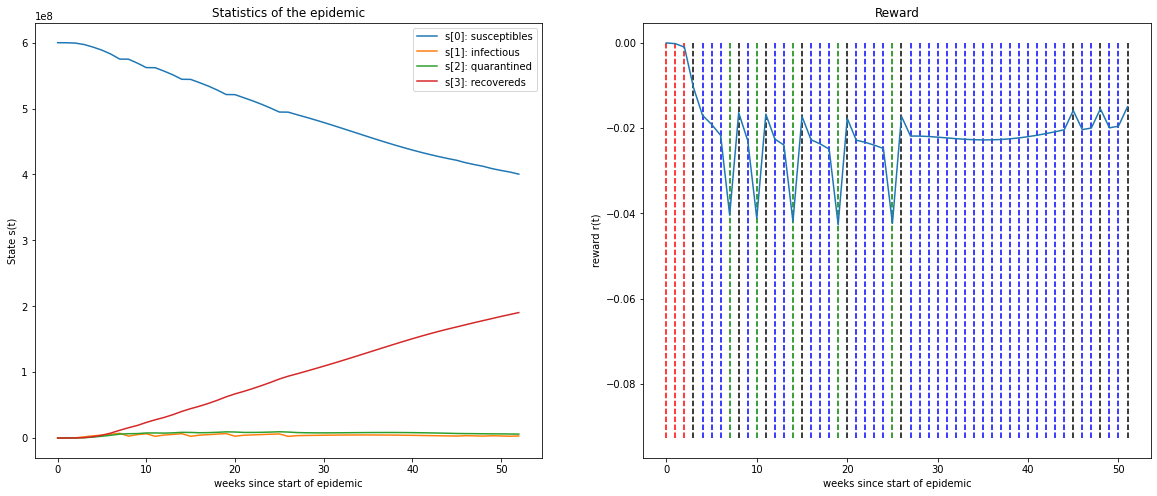

In [8]:
utils.evaluate(greedy_threshold)

0 [0, 0, 0, 3, 2, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3]
total reward -1.1228586575302093
1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3]
total reward -0.3263694914278437
2 [0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
total reward -0.6056926907476119
3 [0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2]
total reward -0.7877442402410106
4 [0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3]
total reward -0.9633919157047456
5 [0, 0, 3, 3, 2, 1, 3, 1, 3, 2, 1, 2, 2

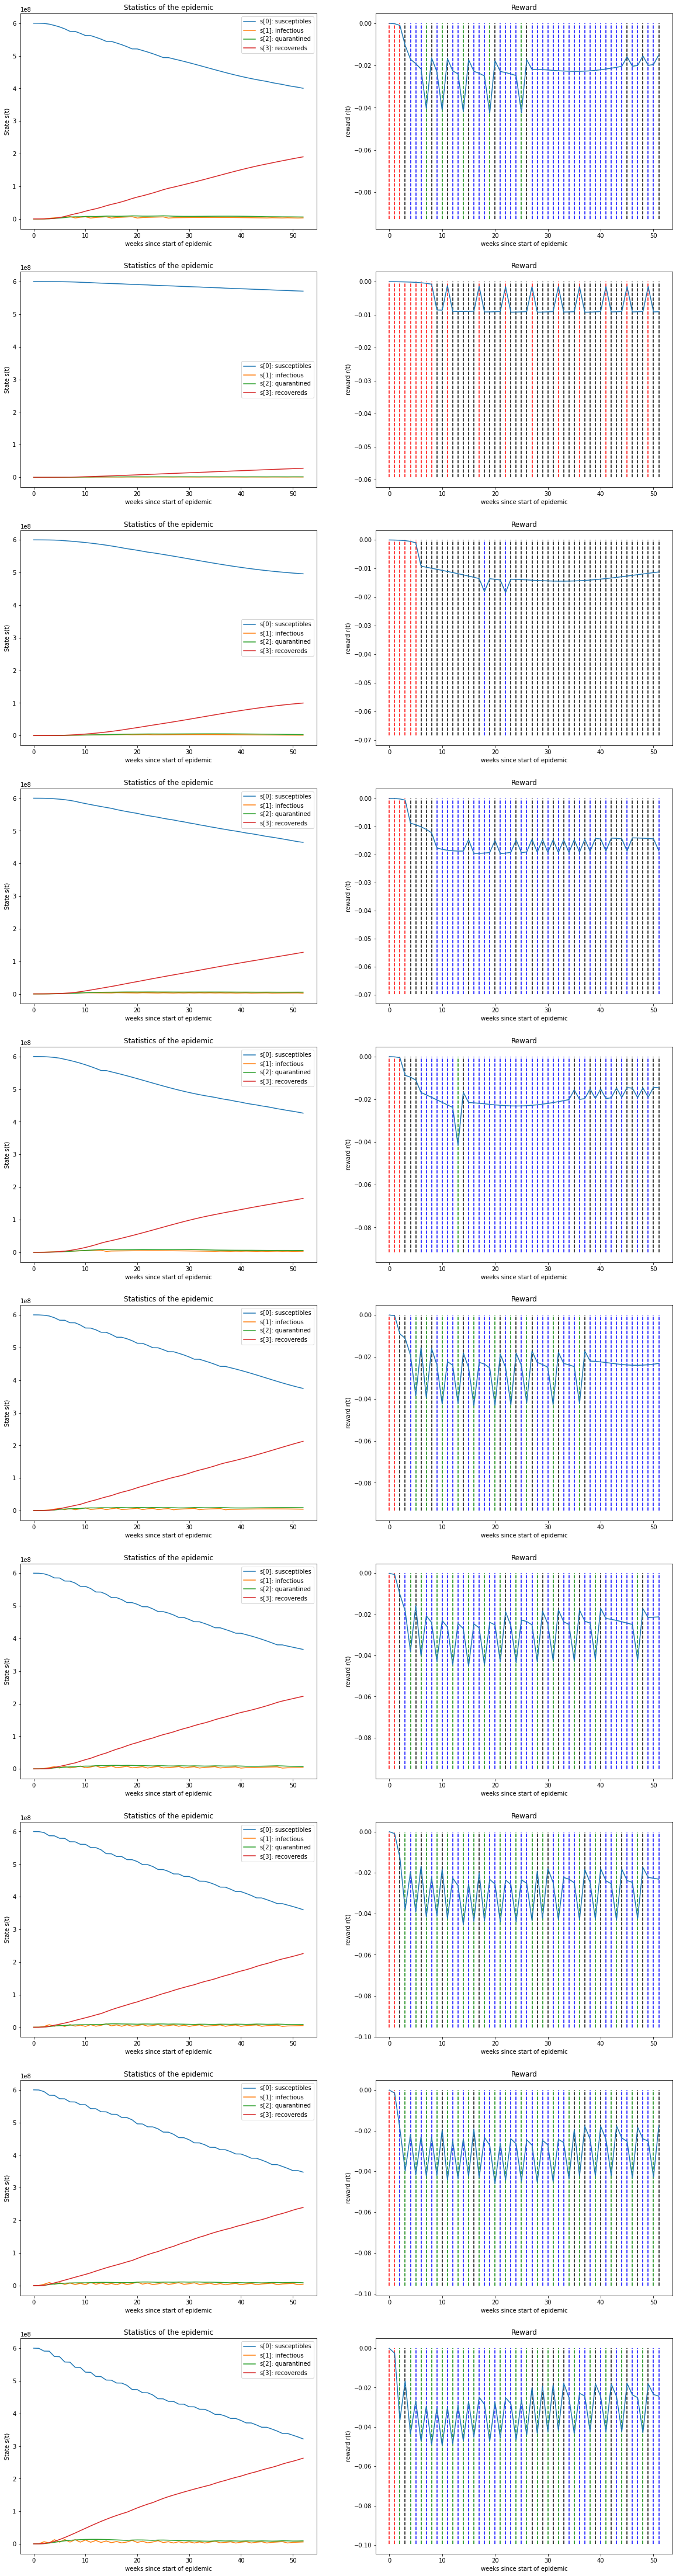

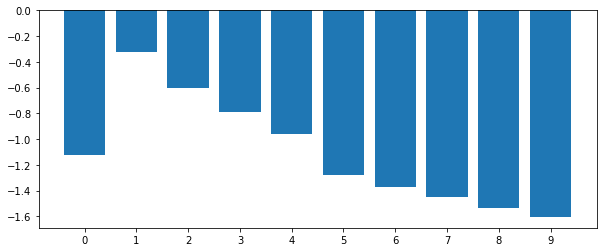

In [9]:
utils.evaluate(greedy_threshold, full_eval=True)

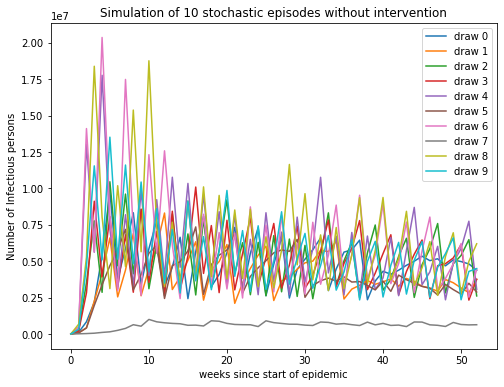

In [10]:
utils.evaluate_stochastic(greedy_threshold)

## Part 2: a greedy deterministic approach

The reward function is simply defined like this:

```python
a = s[1] + s[2]
# s: epidemic state (normalized)
# c: policy severity
b = 1-c
return (-30*a - 30*a**2 - b - b**2)/62
```

where s[1] and s[2] are respectively the infectious and quarantined people, c is the choice (ranging from no restriction (0), full lockdown (1), track & trace (2), social distancing(3)).

We would like to plug in this reward function to perform a greedy choice. Unfortunately, this only works if we could see the next reward. In general, we cannot compute the reward of an action unless and until we perform it, unless we make a clone of the SIQR environment. But this sounds very unrealistic and would defeat the idea of a model-agnostic solution.

Thus, we will simplify the model as follows:



In [38]:
env = virl.Epidemic()

def eval_reward(state, action):
    policy_severity_factor = 1e11
    a = state[1] + state[2]
    b = (1 - action)
    
    expected_a = a*(1 + action - 0.1)
    val = (-expected_a - expected_a ** 2 - policy_severity_factor*b - policy_severity_factor*b**2) / policy_severity_factor
    
    
    return val

def policy_greedy(state):
    greedy_rewards = np.array([eval_reward(state, a) for a in env.actions])
    action_id = np.argmax(greedy_rewards)
    
    action_proba = [0.0] * 4
    action_proba[action_id] = 1.0
    
    return action_proba

### Analysis

0 [0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2]
total reward -0.880025404543352


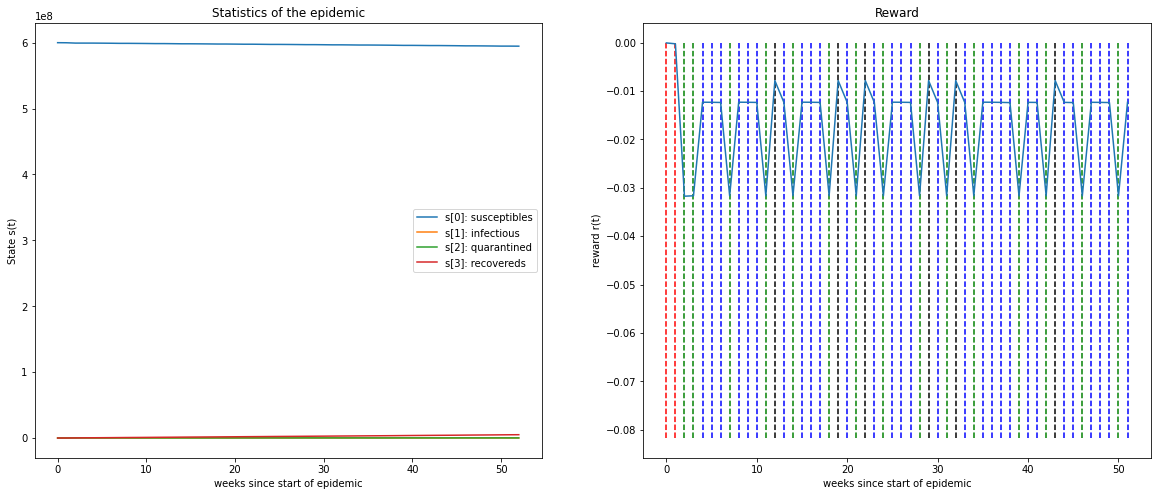

In [39]:
utils.evaluate(policy_greedy)

#### Full evaluation, without noise

0 [0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2]
total reward -0.880025404543352
1 [0, 0, 0, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3]
total reward -0.3178534651402326
2 [0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3]
total reward -0.4866704880758603
3 [0, 0, 0, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
total reward -0.6346363847908081
4 [0, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 3, 2]
total reward -0.7741122673926467
5 [0, 0, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1,

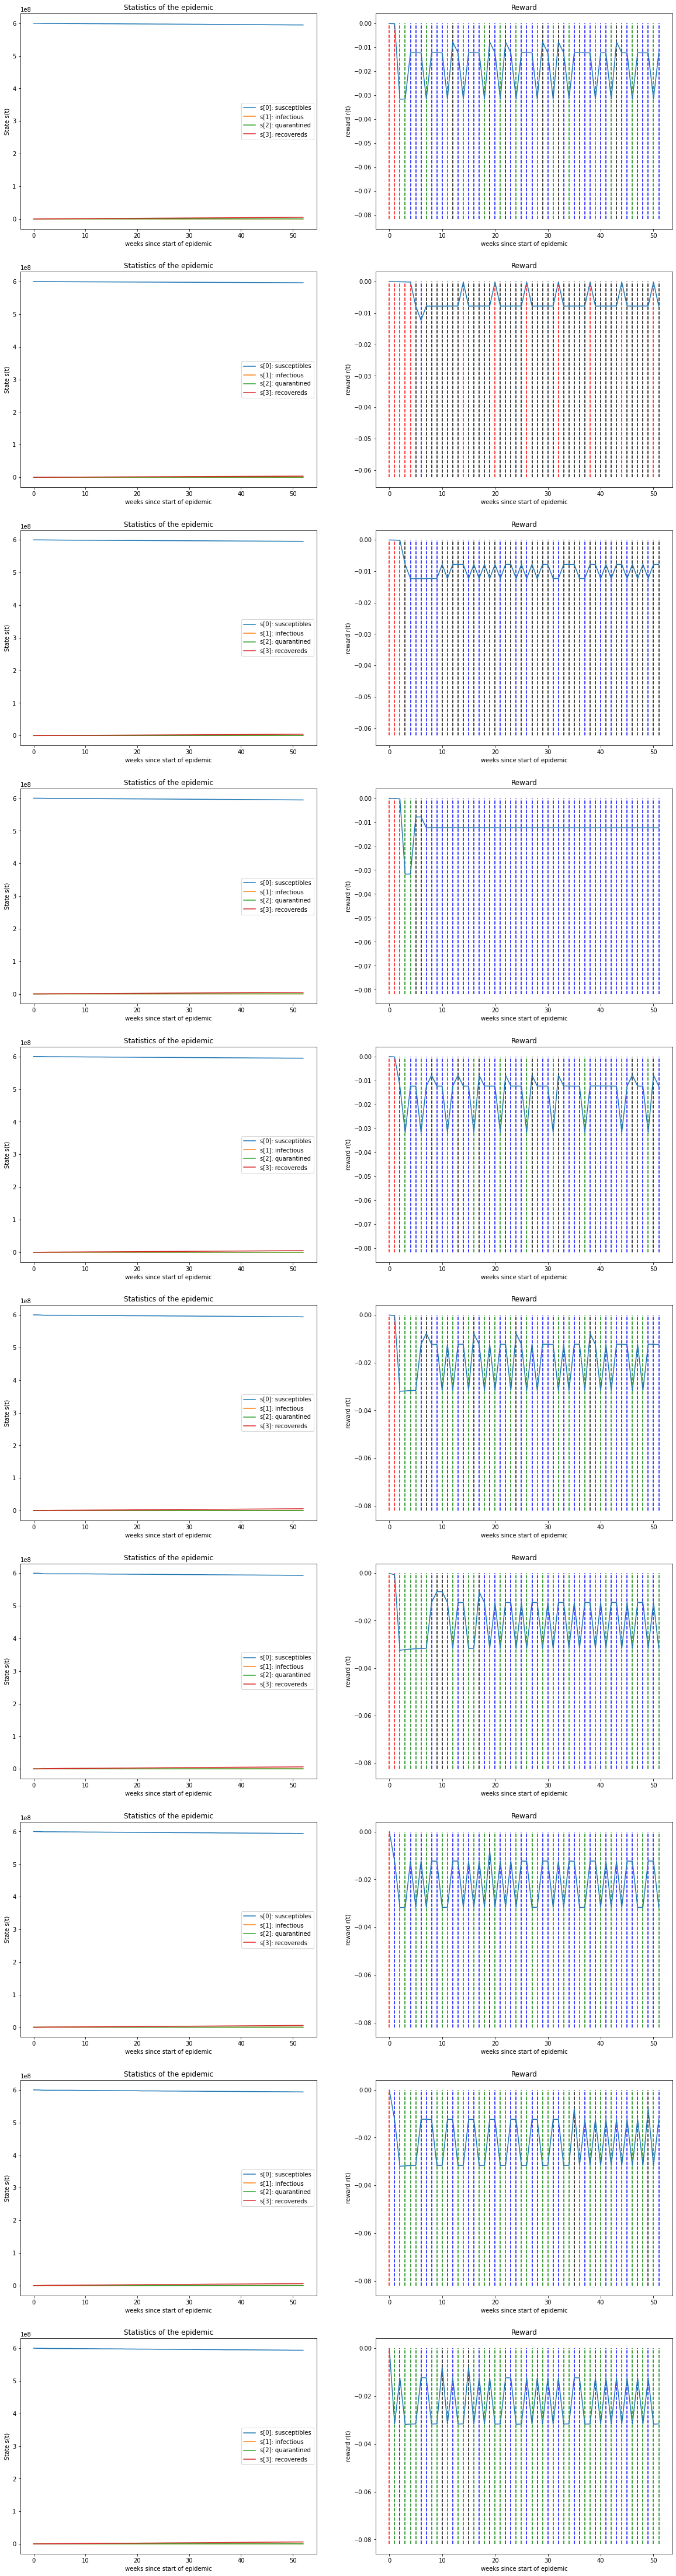

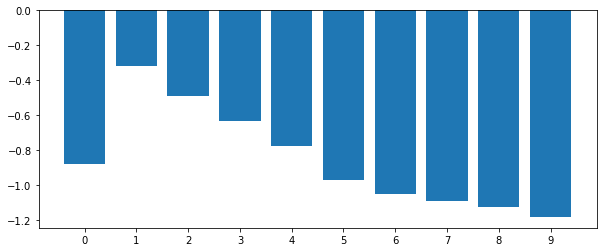

In [40]:
utils.evaluate(policy_greedy, full_eval=True)

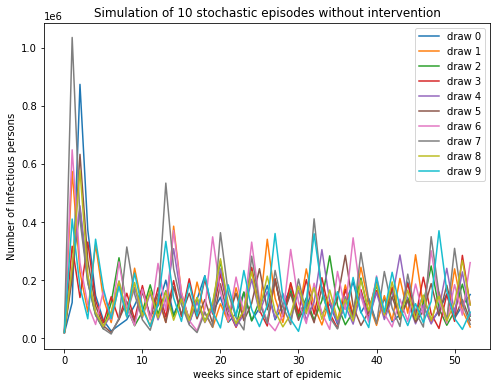

In [41]:
utils.evaluate_stochastic(policy_greedy)

Our greedy policy somewhat upholds people's safety.